# Exploratory Data Analysis of Datasets

## Dataset List: 

1. PhysioNet 2021 Challenge

```
    Data Sources: 
    
    CPSC Database and CPSC-Extra Database
    INCART Database
    PTB and PTB-XL Database
    The Georgia 12-lead ECG Challenge (G12EC) Database
    Augmented Undisclosed Database
    Chapman-Shaoxing and Ningbo Database
    The University of Michigan (UMich) Database
```

2. CODE-15%

```
    Data Sources:

    The CODE dataset was collected by the Telehealth Network of Minas Gerais (TNMG) in the period between 2010 and 2016. TNMG is a public telehealth system assisting 811 out of the 853 municipalities in the state of Minas Gerais, Brazil
```

## PhysioNet 2021 Challenge

The training data contains twelve-lead ECGs. The validation and test data contains twelve-lead, six-lead, four-lead, three-lead, and two-lead ECGs:

1. Twelve leads: I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5, V6
2. Six leads: I, II, III, aVR, aVL, aVF
3. Four leads: I, II, III, V2
4. Three leads: I, II, V2
5. Two leads: I, II

Each ECG recording has one or more labels that describe cardiac abnormalities (and/or a normal sinus rhythm).

The Challenge data include annotated twelve-lead ECG recordings from six sources in four countries across three continents. These databases include over 100,000 twelve-lead ECG recordings with over 88,000 ECGs shared publicly as training data.

## CODE-15% Dataset

A dataset of 12-lead ECGs with annotations. The dataset contains 345 779 exams from 233 770 patients. It was obtained through stratified sampling from the CODE dataset ( 15% of the patients). The data was collected by the Telehealth Network of Minas Gerais in the period between 2010 and 2016.

- This repository contains the files `exams.csv` and the files `exams_part{i}.zip` for i = 0, 1, 2, ... 17. 

- "exams.csv": is a comma-separated values (csv) file containing the columns
- "exam_id": id used for identifying the exam;
- "age": patient age in years at the moment of the exam;
- "is_male": true if the patient is male;
- "nn_predicted_age": age predicted by a neural network to the patient. As described in the paper "Deep neural network estimated electrocardiographic-age as a mortality predictor" bellow.
- "1dAVb": Whether or not the patient has 1st degree AV block;
- "RBBB": Whether or not the patient has right bundle branch block;
- "LBBB": Whether or not the patient has left bundle branch block;
- "SB": Whether or not the patient has sinus bradycardia;
- "AF": Whether or not the patient has atrial fibrillation;
- "ST": Whether or not the patient has sinus tachycardia;
- "patient_id": id used for identifying the patient;
- "normal_ecg": True if the patient has a normal ECG;
- "death": true if the patient dies in the follow-up time. This data is available only in the first exam of the patient. Other exams will have this as an empty field;
- "timey": if the patient dies it is the time to the death of the patient. If not, it is the follow-up time. This data is available only in the first exam of the patient. Other exams will have this as an empty field;
- "trace_file": identify in which hdf5 file the file corresponding to this patient is located.
- "exams_part{i}.hdf5": The HDF5 file containing two datasets named `tracings` and other named `exam_id`. The `exam_id` is a tensor of dimension `(N,)` containing the exam id (the same as in the csv file) and the dataset `tracings` is a `(N, 4096, 12)` tensor containing the ECG tracings in the same order. The first dimension corresponds to the different exams; the second dimension corresponds to the 4096 signal samples; the third dimension to the 12 different leads of the ECG exams in the following order: `{DI, DII, DIII, AVR, AVL, AVF, V1, V2, V3, V4, V5, V6}`. The signals are sampled at 400 Hz. Some signals originally have a duration of 10 seconds (10 * 400 = 4000 samples) and others of 7 seconds (7 * 400 = 2800 samples). In order to make them all have the same size (4096 samples), we fill them with zeros on both sizes. For instance, for a 7 seconds ECG signal with 2800 samples we include 648 samples at the beginning and 648 samples at the end, yielding 4096 samples that are then saved in the hdf5 dataset. 


This dataset can be read using **h5py** module.

## Data Exploration & Examples

In [ ]:
# General imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import sys

# ECG-specific
import h5py

In [ ]:
os.listdir('C:/Users/navme/Desktop/ECG_Project/PyFiles')

In [ ]:
sys.path.append('C:/Users/navme/Desktop/ECG_Project/PyFiles')

In [ ]:
# Import helper functions
import helper_functions as hf
import helper_function_tests as hft
import dataset

### CODE-15

In [ ]:
# Folder & Subfolder File Paths
CODE_15_DATASET_PATH = r"C:\Users\navme\Desktop\ECG_Thesis_Local\CODE-15 Datasets\Dataset"

CODE_15_SUB_DIR = os.listdir(CODE_15_DATASET_PATH)
CODE_15_SUB_DIR

CODE_15_FILE_PATHS = set()

In [ ]:
for sub_dir in CODE_15_SUB_DIR:
    file_path = os.path.join(hf.convert_to_forward_slashes(CODE_15_DATASET_PATH), sub_dir)
    if file_path not in CODE_15_FILE_PATHS:
        CODE_15_FILE_PATHS.add(file_path)

len(CODE_15_FILE_PATHS)

In [24]:
CODE_15_FILE_PATHS

['C:/Users/navme/Desktop/ECG_Thesis_Local/CODE-15 Datasets/Dataset\\exams.csv',
 'C:/Users/navme/Desktop/ECG_Thesis_Local/CODE-15 Datasets/Dataset\\exams_part0.hdf5',
 'C:/Users/navme/Desktop/ECG_Thesis_Local/CODE-15 Datasets/Dataset\\exams_part1.hdf5',
 'C:/Users/navme/Desktop/ECG_Thesis_Local/CODE-15 Datasets/Dataset\\exams_part10.hdf5',
 'C:/Users/navme/Desktop/ECG_Thesis_Local/CODE-15 Datasets/Dataset\\exams_part11.hdf5',
 'C:/Users/navme/Desktop/ECG_Thesis_Local/CODE-15 Datasets/Dataset\\exams_part12.hdf5',
 'C:/Users/navme/Desktop/ECG_Thesis_Local/CODE-15 Datasets/Dataset\\exams_part13.hdf5',
 'C:/Users/navme/Desktop/ECG_Thesis_Local/CODE-15 Datasets/Dataset\\exams_part14.hdf5',
 'C:/Users/navme/Desktop/ECG_Thesis_Local/CODE-15 Datasets/Dataset\\exams_part15.hdf5',
 'C:/Users/navme/Desktop/ECG_Thesis_Local/CODE-15 Datasets/Dataset\\exams_part16.hdf5',
 'C:/Users/navme/Desktop/ECG_Thesis_Local/CODE-15 Datasets/Dataset\\exams_part17.hdf5',
 'C:/Users/navme/Desktop/ECG_Thesis_Local/

In [ ]:
CODE_15_FILE_PATHS = sorted(list(CODE_15_FILE_PATHS))
exams = pd.read_csv(CODE_15_FILE_PATHS[0])

In [21]:
exam_part0 =  h5py.File("C:/Users/navme/Desktop/ECG_Thesis_Local/CODE-15 Datasets/Dataset/exams_part0.hdf5", 'r')

print("Groups:", list(exam_part0.keys()))

# Get ids
exam_ids = np.array(exam_part0['exam_id'])

# Access the 'tracings' group
tracings_group = exam_part0['tracings']

Groups: ['exam_id', 'tracings']


In [22]:
type(exam_ids), type(tracings_group)

(numpy.ndarray, h5py._hl.dataset.Dataset)

In [ ]:
len(exam_ids), len(tracings_group)

In [ ]:
# The `exam_id` is a tensor of dimension `(N,)` containing the exam id (the same as in the csv file) and 
# the dataset `tracings` is a `(N, 4096, 12)` tensor containing the ECG tracings in the same order. 
# The first dimension corresponds to the different exams; 
# the second dimension corresponds to the 4096 signal samples; 
# the third dimension to the 12 different leads of the ECG exams in the following order: `{DI, DII, DIII, AVR, AVL, AVF, V1, V2, V3, V4, V5, V6}`

exam_ids.shape, tracings_group.shape

In [ ]:
exam_ids[0]

#### Example of what various ECG abnormalities look like:

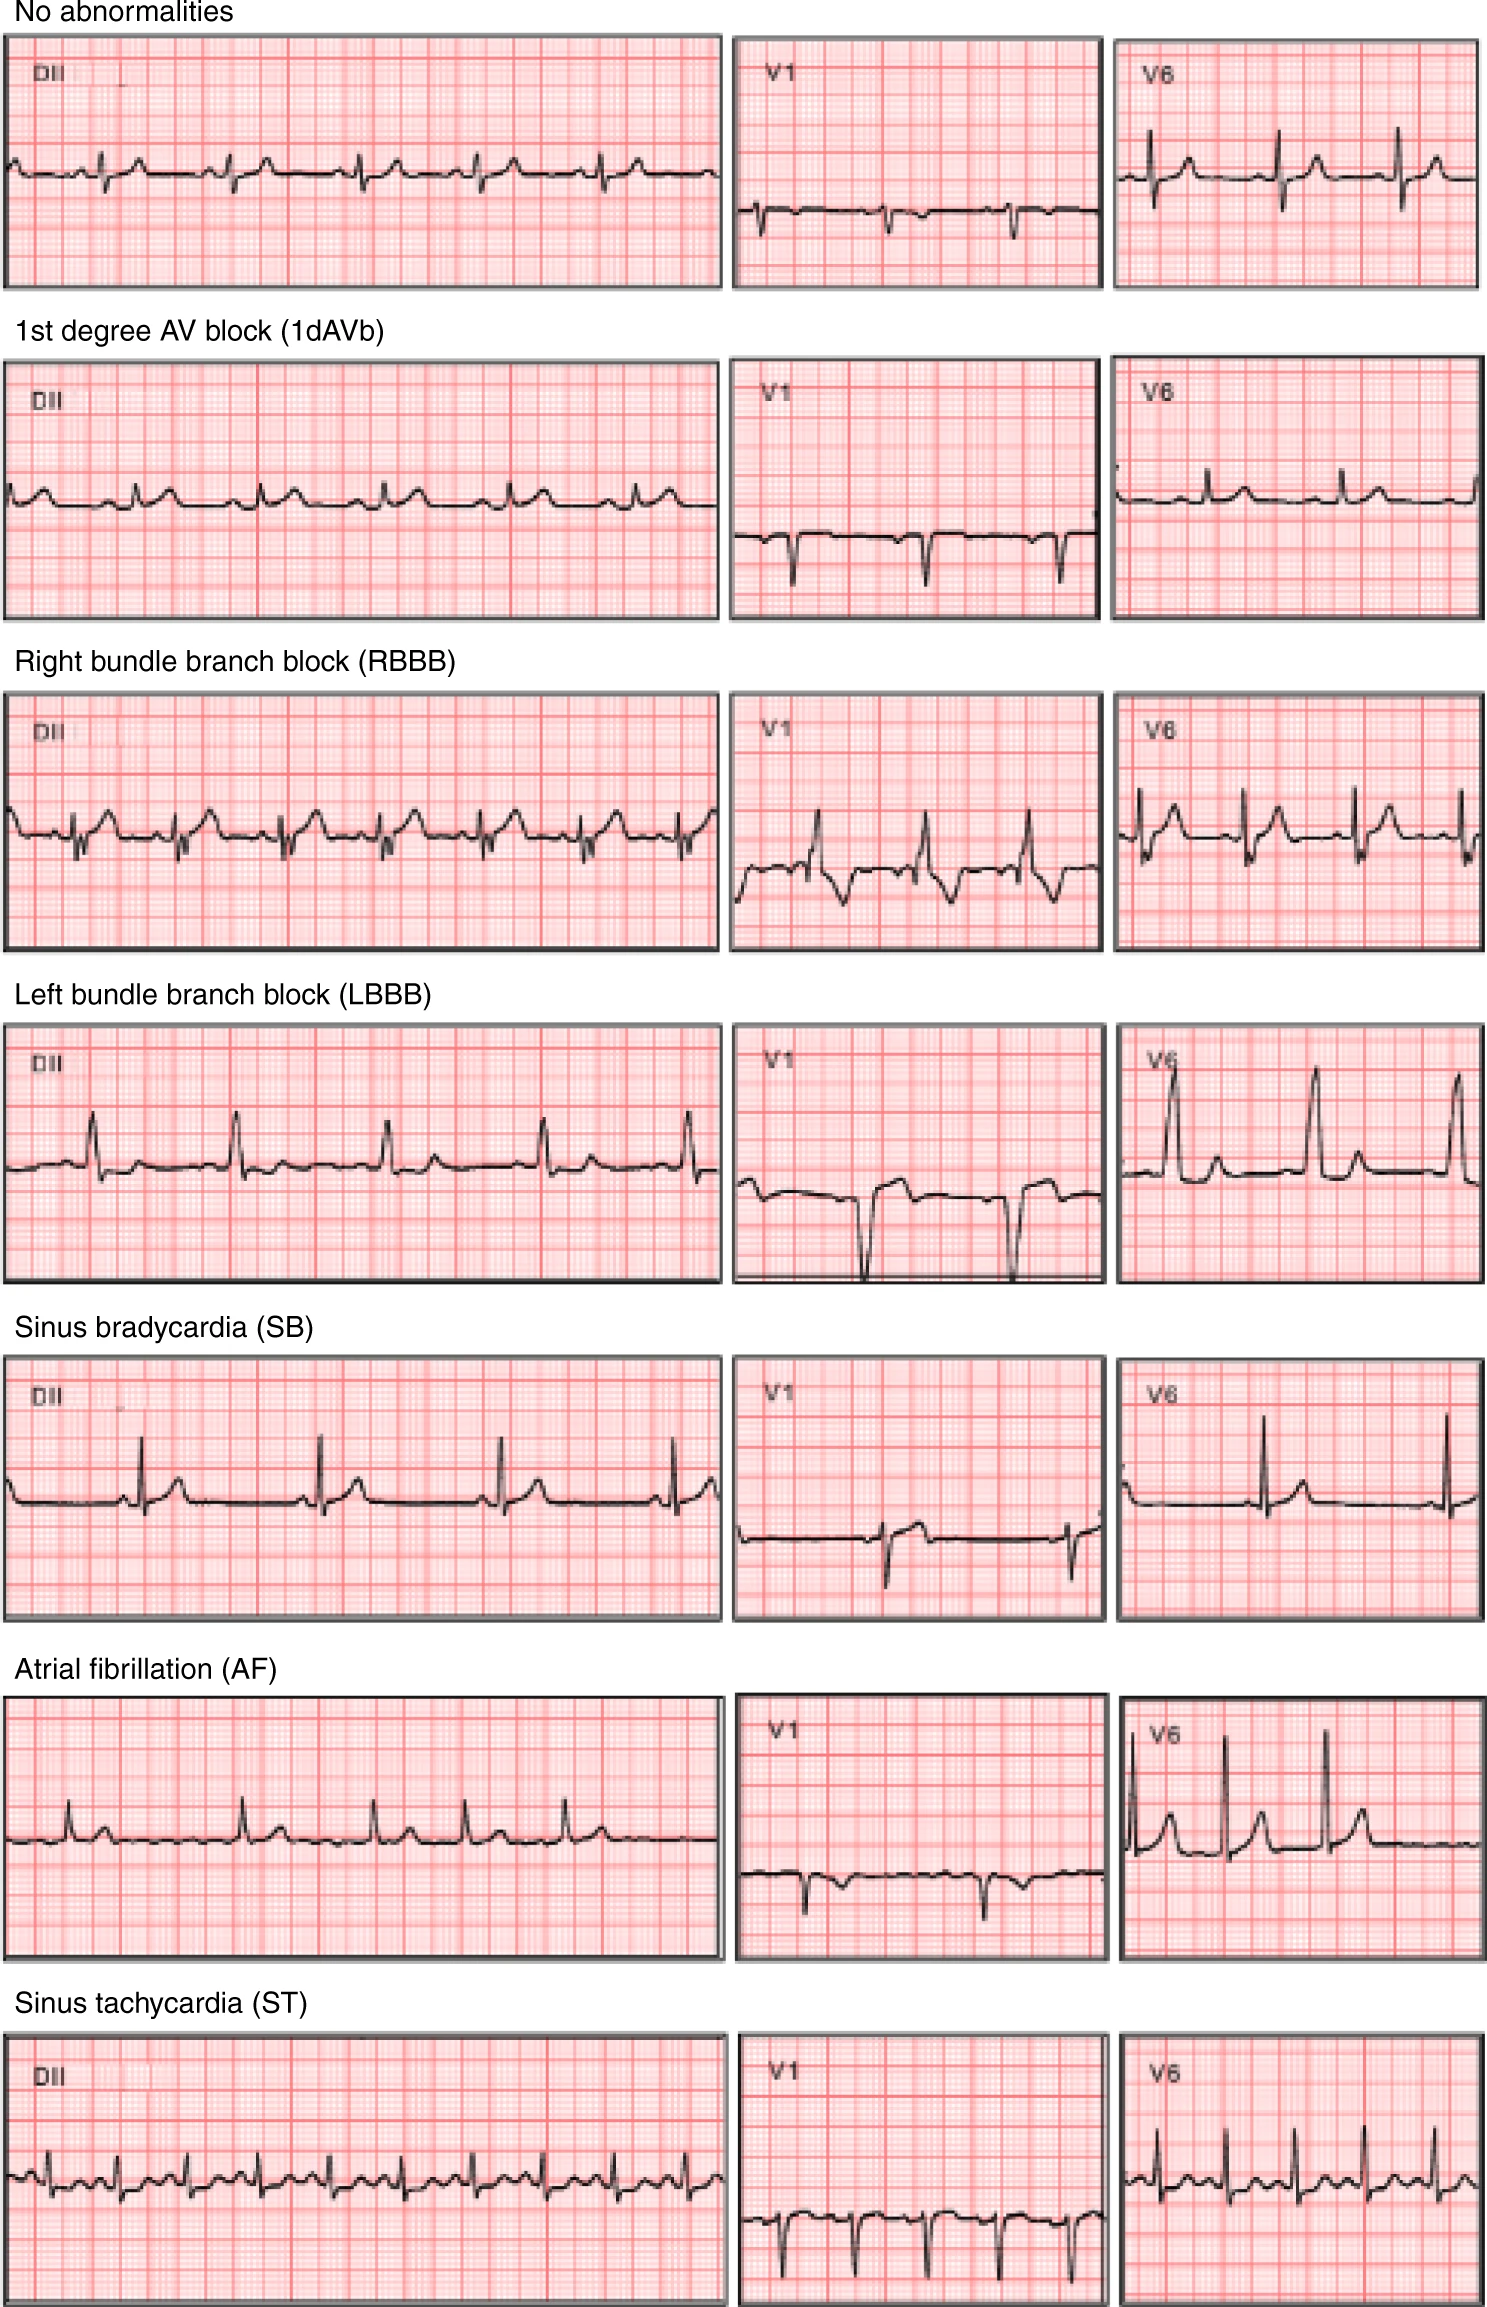

#### Example of ECG data in CODE-15

In [ ]:
part_0_sample = exams[exams['trace_file'] == 'exams_part0.hdf5']

# List of columns to check
cols_to_check = ['1dAVb', 'RBBB', 'LBBB', 'SB', 'ST', 'AF']

# Dictionary to store the first row that meets the condition for each column
abnormality_samples = {}

# Loop through each row in the dataframe
for index, row in part_0_sample.iterrows():
    # Check if any of the specified columns have a value of True
    for col in cols_to_check:
        if row[col]:
            # If the column has not been found yet, store the row in the dictionary
            if col not in abnormality_samples:
                abnormality_samples[col] = row
                break

    # If all columns have been found, break out of the loop
    if len(abnormality_samples) == len(cols_to_check):
        break

# Print the first row that meets the condition for each column
abnormality_samples_df = pd.DataFrame(abnormality_samples.values(), index=abnormality_samples.keys())
abnormality_samples_df

In [ ]:
# LBBB & AF; exam_id = 2999852
lbbb_af_exam_id_idx = (exam_ids == 2999852).nonzero()[0][0]
lbbb_af_tracing = tracings_group[lbbb_af_exam_id_idx]

# Get the sampling frequency (in Hz)
fs = 400

# Calculate the time axis
t = np.arange(lbbb_af_tracing.shape[0]) / fs

# Plot the first lead (DI)
plt.plot(t, lbbb_af_tracing[:, 0])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.title(f'ECG Tracing (Lead DI) for Exam {exam_ids[lbbb_af_exam_id_idx]}')
plt.show()

Using `plot_ecg()` function:

In [ ]:
# LBBB & AF: Left bundle branch block (LBBB) and atrial fibrillation (AF)
exam_id = 2999852
exam_index = (exam_ids == exam_id).nonzero()[0][0]
hf.plot_ecg(exam_index, tracings_group)

In [ ]:
# RBBB: Right bundle branch block (RBBB)
exam_id = 389748
exam_index = (exam_ids == exam_id).nonzero()[0][0]
hf.plot_ecg(exam_index, tracings_group)

In [ ]:
# AF: Atrial fibrillation (AF)
exam_id = 3076199
exam_index = (exam_ids == exam_id).nonzero()[0][0]
hf.plot_ecg(exam_index, tracings_group)

In [ ]:
# ST: Sinus tachycardia (ST)
exam_id = 244388
exam_index = (exam_ids == exam_id).nonzero()[0][0]
hf.plot_ecg(exam_index, tracings_group)

In [ ]:
# 1dAVb: 1st degree AV block (1dAVb)
exam_id = 66632
exam_index = (exam_ids == exam_id).nonzero()[0][0]
hf.plot_ecg(exam_index, tracings_group)

In [ ]:
# SB: Sinus bradycardia (SB)
exam_id = 115342
exam_index = (exam_ids == exam_id).nonzero()[0][0]
hf.plot_ecg(exam_index, tracings_group)

# CODE15Dataset Class

In [25]:
os.listdir(CODE_15_DATASET_PATH)

['exams.csv',
 'exams_part0.hdf5',
 'exams_part1.hdf5',
 'exams_part10.hdf5',
 'exams_part11.hdf5',
 'exams_part12.hdf5',
 'exams_part13.hdf5',
 'exams_part14.hdf5',
 'exams_part15.hdf5',
 'exams_part16.hdf5',
 'exams_part17.hdf5',
 'exams_part2.hdf5',
 'exams_part3.hdf5',
 'exams_part4.hdf5',
 'exams_part5.hdf5',
 'exams_part6.hdf5',
 'exams_part7.hdf5',
 'exams_part8.hdf5',
 'exams_part9.hdf5']

In [ ]:
class CODE15Dataset(torch.utils.data.Dataset):
    def __init__(self, dataset_path, train=False):
        self.dataset_path = sorted(list(dataset_path))
        self.train = train
        self.file_list = os.listdir(dataset_path)
        self._exam_ids = []
        self._tracings_group = []
        
        """
        exams.csv column names: 
            - exam_id
            - age
            - is_male
            - nn_predicted_age
            - 6 modalities: 
                1. First degree atrioventricular block: 1dAVb
                2. Right bundle branch block: RBBB
                3. Left bundle branch: LBBB
                4. Sinus bradycardia: SB
                5. Atrial fibrillation: AF
                6. Sinus tachycardia: ST
            - patient_id
            - normal_ecg
            - death
            - timey
            - trace_file
        """
        exams = pd.read_csv(self.dataset_path[0]) 

        pass
    